<a href="https://colab.research.google.com/github/Ingasha-Sharon/UNSUPERVISED-LEARNING/blob/main/Intro_to_PCA%2C_t_SNE_%26_UMAP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Introduction

# Libraries

In [ ]:
# Install umap-learn and its plotting dependencies if not already installed
!pip install umap-learn[plot]

import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=1.4)
import plotly.express as px

# Sklearn
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# UMAP
import umap
import umap.plot


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 43.4 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/cudf/utils/_ptxcompiler.py:61: UserWarning: Error getting driver and runtime versions:

stdout:



stderr:

Traceback (most recent call last):
  File "<string>", line 4, in <module>
  File "/usr/local/lib/python3.10/dist-packages/numba/cuda/cudadrv/driver.py", line 295, in __getattr__
    raise CudaSupportError("Error at driver init: \n%s:" %
numba.cuda.cudadrv.error.CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:


Not patching Numba
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Failed to dlopen libcuda.so.1
  warnings.warn(str(e))
/usr/local/lib/python3.10/dist-packages/cudf/utils/gpu_utils.py:62: UserWarning: Function "cuInit" not found
  warnings.warn(str(e))
/usr/local/lib/python3.10/dist-p

# Data

We will be working with a wine dataset, which contains **13 features** describing **3 different wine types**. We don't know which types are which, so we will start by using unsupervised learning (i.e. untagged data) to explore this dataset.

In [ ]:
# Training data
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/wine-clustering.csv')

# Dimensions
print('Dataframe dimensions:',data.shape)

# First 5 entries of training data
data.head()

Dataframe dimensions: (178, 13)


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


**EDA**

In [ ]:
print(f'Missing values in dataset: {data.isna().sum().sum()}')
print('')
print(f'Duplicates in dataset: {data.duplicated().sum()}, ({np.round(100*data.duplicated().sum()/len(data),1)}%)')
print('')
print(f'Data types: {data.dtypes.unique()}')

Missing values in dataset: 0

Duplicates in dataset: 0, (0.0%)

Data types: [dtype('float64') dtype('int64')]


**Preprocessing**

It is good practice to scale our data, so that we don't bias our methods later on.

In [ ]:
# This scales each column to have mean=0 and standard deviation=1
SS=StandardScaler()

# Apply scaling
X=pd.DataFrame(SS.fit_transform(data), columns=data.columns)

# PCA

**Principal Component Analysis (PCA)** was the first dimensionality reduction technique discovered (by Karl Pearson - yes, the guy from Pearson's correlation coefficient) and dates back to as early as **1901**. It is very popular because it is **fast**, **easy to implement** and **easy to interpret**.

PCA works by finding a low dimensional subspace that **maximises the variance** of the data in that subspace and performing a **linear projection**. This basically means the data will be as **spread out** as possible, without changing the relationship between the data points. This allows us to find patterns or indentify clusters if any exist.

In [ ]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Convert to data frame
principal_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])

# Shape and preview
print(principal_df.shape)
principal_df.head()

(178, 2)


,PC1,PC2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


The new columns are called **Principal Components** (PC's) and give the coordinates of the data in the new smaller space.

**PCA plot in 2D**

Text(0, 0.5, 'PC2')

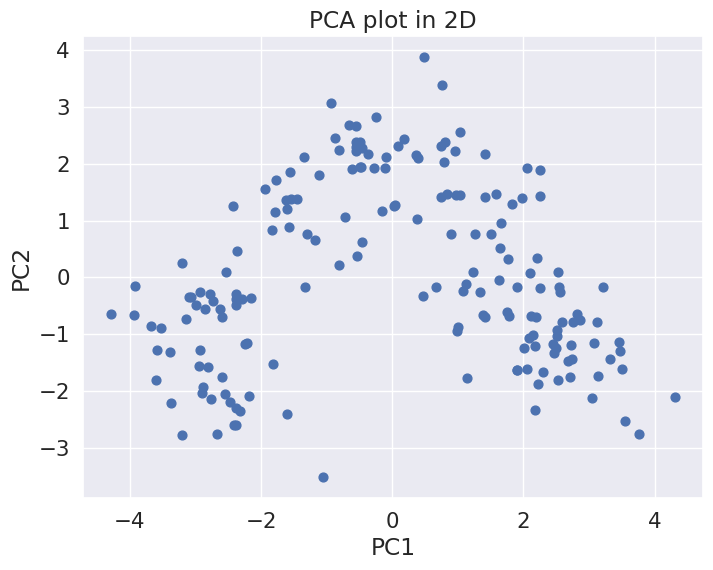

In [ ]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], s=40)

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

# k-Means clustering

In [ ]:
# KMeans
kmeans = KMeans(n_clusters=3, n_init=15, max_iter=500, random_state=0)

# Train and make predictions
clusters = kmeans.fit_predict(X)

# Cluster centers
centroids = kmeans.cluster_centers_
centroids_pca = pca.transform(centroids)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


**PCA plot in 2D coloured by cluster**

Text(0, 0.5, 'PC2')

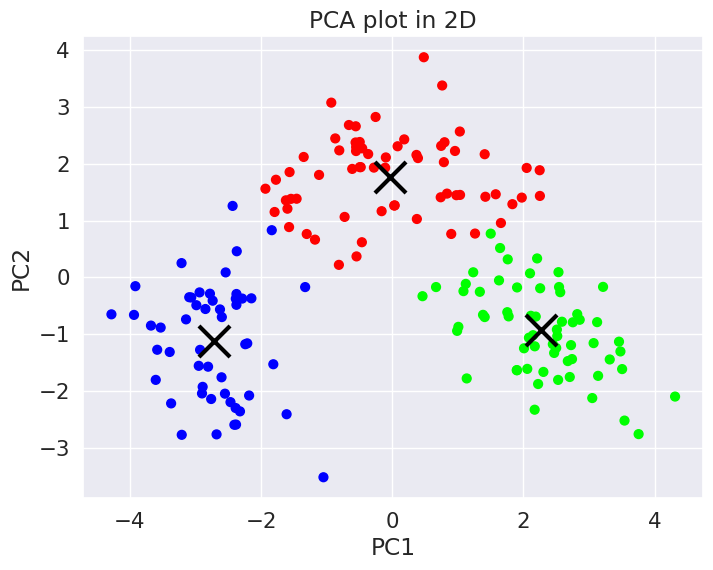

In [ ]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(principal_df.iloc[:,0], principal_df.iloc[:,1], c=clusters, cmap="brg", s=40)
plt.scatter(x=centroids_pca[:,0], y=centroids_pca[:,1], marker="x", s=500, linewidths=3, color="black")

# Aesthetics
plt.title('PCA plot in 2D')
plt.xlabel('PC1')
plt.ylabel('PC2')

**PCA plot in 3D**

In [ ]:
# PCA
pca = PCA(n_components=3)
components = pca.fit_transform(X)

# 3D scatterplot
fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=clusters, size=0.1*np.ones(len(X)), opacity = 1,
    title='PCA plot in 3D',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'},
    width=650, height=500
)
fig.show()

**Explained variance**

Explained variance shows how much of the variance/spread of the data is captured in each dimension, i.e. how **important** each additional **principal component** is to the original data representation.

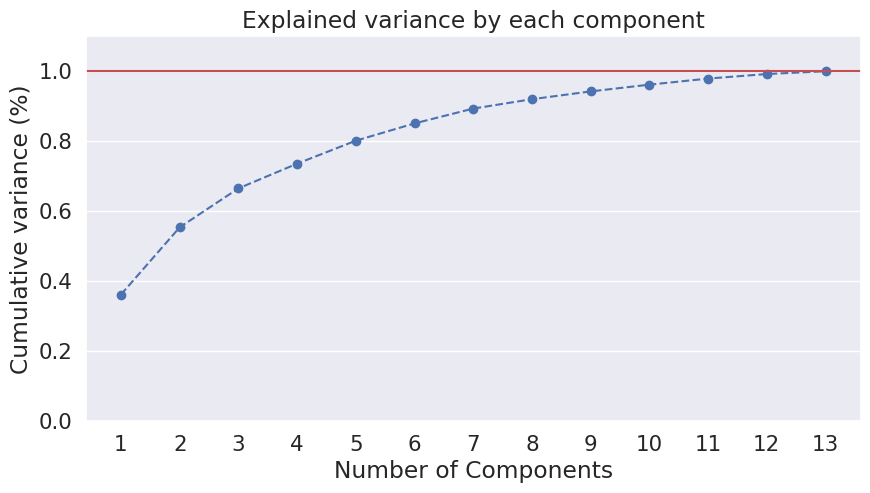

In [ ]:
# PCA
pca_var = PCA()
pca_var.fit(X)

# Plot
plt.figure(figsize=(10,5))
xi = np.arange(1, 1+X.shape[1], step=1)
yi = np.cumsum(pca_var.explained_variance_ratio_)
plt.plot(xi, yi, marker='o', linestyle='--', color='b')

# Aesthetics
plt.ylim(0.0,1.1)
plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 1+X.shape[1], step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('Explained variance by each component')
plt.axhline(y=1, color='r', linestyle='-')
plt.gca().xaxis.grid(False)

# t-SNE

In [ ]:
# t-SNE
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

# Convert to data frame
tsne_df = pd.DataFrame(data = X_tsne, columns = ['tsne comp. 1', 'tsne comp. 2'])

# Shape and preview
print(tsne_df.shape)
tsne_df.head()

(178, 2)


,tsne comp. 1,tsne comp. 2
0,10.387938,9.010440
1,9.480375,1.664347
2,8.691434,6.371213
3,13.089097,7.065781
4,6.638926,4.119053


**t-SNE plot in 2D coloured by class**

Text(0, 0.5, 'tsne component 2')

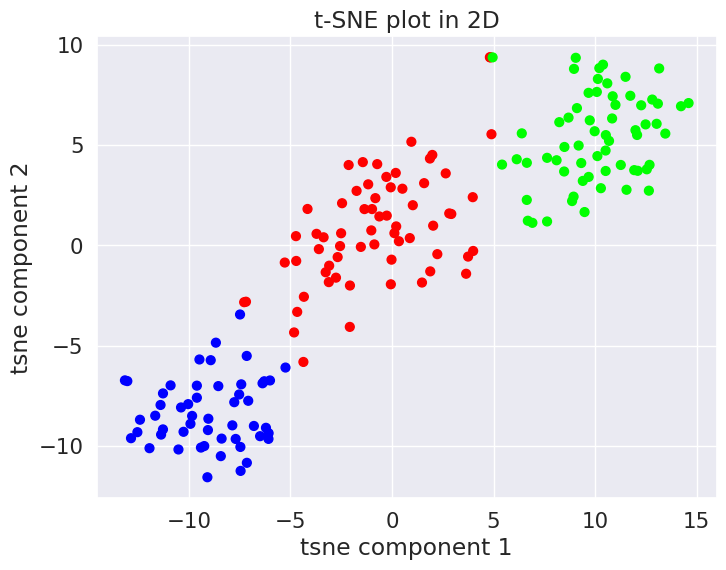

In [ ]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(tsne_df.iloc[:,0], tsne_df.iloc[:,1], c=clusters, cmap="brg", s=40)

# Aesthetics
plt.title('t-SNE plot in 2D')
plt.xlabel('tsne component 1')
plt.ylabel('tsne component 2')

**t-SNE plot in 3D**

In [ ]:
# t-SNE
tsne = TSNE(n_components=3)
components_tsne = tsne.fit_transform(X)

# 3D scatterplot
fig = px.scatter_3d(
    components_tsne, x=0, y=1, z=2, color=clusters, size=0.1*np.ones(len(X)), opacity = 1,
    title='t-SNE plot in 3D',
    labels={'0': 'comp. 1', '1': 'comp. 2', '2': 'comp. 3'},
    width=650, height=500
)
fig.show()

If you run this cell several times, you will see that the 3D t-SNE plot looks quite different each time.

# UMAP

In [ ]:
# UMAP
um = umap.UMAP()
X_fit = um.fit(X)           # we'll use X_fit later
X_umap = um.transform(X)

# Convert to data frame
umap_df = pd.DataFrame(data = X_umap, columns = ['umap comp. 1', 'umap comp. 2'])

# Shape and preview
print(umap_df.shape)
umap_df.head()

(178, 2)


,umap comp. 1,umap comp. 2
0,10.567664,6.583921
1,9.278648,6.444705
2,9.448690,7.797532
3,10.371341,7.968307
4,8.191910,7.437068


**UMAP plot in 2D coloured by clusters**

Text(0, 0.5, 'umap component 2')

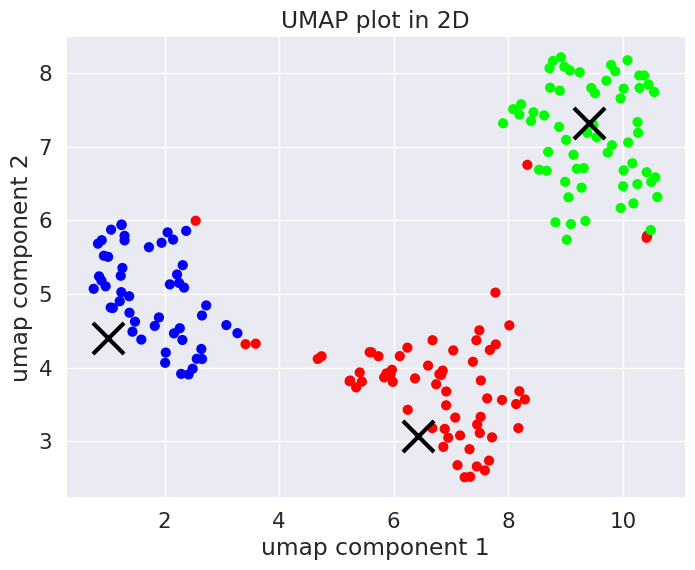

In [ ]:
# Figure size
plt.figure(figsize=(8,6))

# Scatterplot
plt.scatter(umap_df.iloc[:,0], umap_df.iloc[:,1], c=clusters, cmap="brg", s=40)

# Centroids
centroids_umap = um.transform(centroids)
plt.scatter(x=centroids_umap[:,0], y=centroids_umap[:,1], marker="x", s=500, linewidths=3, color="black")

# Aesthetics
plt.title('UMAP plot in 2D')
plt.xlabel('umap component 1')
plt.ylabel('umap component 2')

**UMAP plot in 3D**

In [ ]:
# UMAP
um = umap.UMAP(n_components=3)
components_umap = um.fit_transform(X)

# 3D scatterplot
fig = px.scatter_3d(
    components_umap, x=0, y=1, z=2, color=clusters, size=0.1*np.ones(len(X)), opacity = 1,
    title='UMAP plot in 3D',
    labels={'0': 'comp. 1', '1': 'comp. 2', '2': 'comp. 3'},
    width=650, height=500
)
fig.show()

**UMAP connectivity plot**

UMAP can also be represented as a **connected graph**, which can be useful to get insights into the topolical embedding. Currently this function is only available in 2D.

/usr/local/lib/python3.10/dist-packages/datashader/transfer_functions/__init__.py:332: RuntimeWarning:

invalid value encountered in divide



<Axes: >

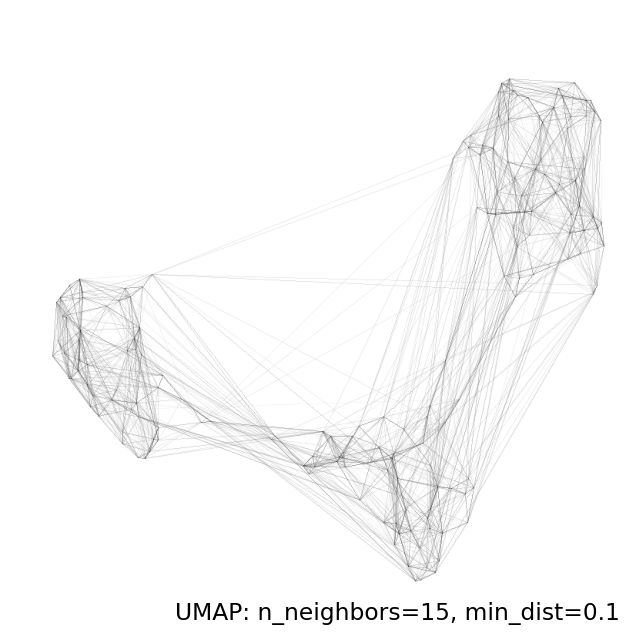

In [ ]:
# Connectivity plot
umap.plot.connectivity(X_fit, show_points=True)

/usr/local/lib/python3.10/dist-packages/umap/plot.py:894: UserWarning:

Hammer edge bundling is expensive for large graphs!
This may take a long time to compute!

/usr/local/lib/python3.10/dist-packages/datashader/transfer_functions/__init__.py:332: RuntimeWarning:

invalid value encountered in divide



<Axes: >

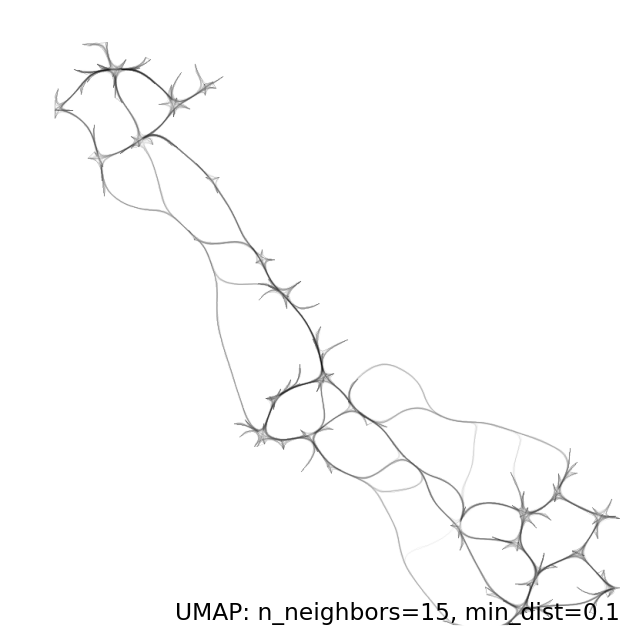

In [ ]:
# Bundling can provide a simplified view of the connections
umap.plot.connectivity(X_fit, show_points=True, edge_bundling='hammer')